<a href="https://colab.research.google.com/github/SiddharthBahuguna/MACHINE-LEARNING/blob/main/Chicken_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/MyDrive/Chicken_Disease_Dataset')
!pwd

/content/drive/MyDrive/Chicken_Disease_Dataset


#Import Required Libraries

In [3]:
# Install TensorFlow
!pip install tensorflow
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from utils import view_random_images, plot_training_curves
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#Set Paths and Parameters

In [4]:
data_dir = pathlib.Path('/content/drive/MyDrive/Chicken_Disease_Dataset/Chicken_Disease_Dataset/train')
train_dir = '/content/drive/MyDrive/Chicken_Disease_Dataset/Chicken_Disease_Dataset/train/'
val_dir = '/content/drive/MyDrive/Chicken_Disease_Dataset/Chicken_Disease_Dataset/val/'
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['Coccidiosis' 'Healthy' 'New Castle Disease' 'Salmonella']


#Visualize Class Distribution

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


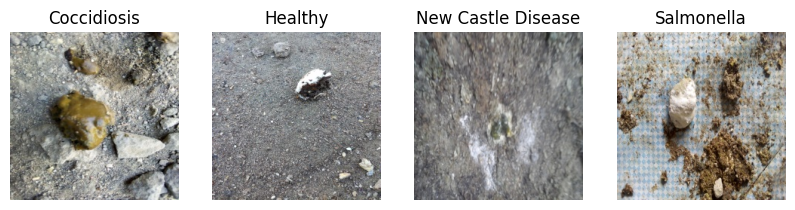

In [7]:
# visualize our data
plt.figure(figsize=(10, 7))
for i, label in enumerate(class_names):
    plt.subplot(1, 4, i+1)
    view_random_images(target_dir=train_dir, target_class=label)

#Loading Training and Validation Data with Data Augmentation

###Data Augmentation for Training Set

In [10]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255.)

###Loading Training and Validation Data from Directories

In [11]:
# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

val_data = val_datagen.flow_from_directory(val_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 800 images belonging to 4 classes.
Found 712 images belonging to 4 classes.


#Building and Compiling the CNN Model

In [12]:
model = Sequential([
  Conv2D(64, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(64, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(50, activation="relu"),
  Dense(50, activation="relu"),
  Dense(4, activation="softmax")
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy'])

#Training the CNN Model on Augmented Data

In [14]:
history = model.fit(train_data,
                        epochs=30,
                        validation_data=val_data)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 631ms/step - accuracy: 0.8777 - loss: 0.3121 - val_accuracy: 0.6545 - val_loss: 1.0113
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 619ms/step - accuracy: 0.7967 - loss: 0.5285 - val_accuracy: 0.7261 - val_loss: 0.8360
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 709ms/step - accuracy: 0.8575 - loss: 0.3512 - val_accuracy: 0.6980 - val_loss: 1.1168
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 614ms/step - accuracy: 0.8348 - loss: 0.4425 - val_accuracy: 0.7669 - val_loss: 0.7497
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 727ms/step - accuracy: 0.8713 - loss: 0.3742 - val_accuracy: 0.6910 - val_loss: 1.0955
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 611ms/step - accuracy: 0.8694 - loss: 0.3433 - val_accuracy: 0.7247 - val_loss: 0.9662
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 614ms/step - accuracy: 0.8326 - loss: 0.3969 - val_accuracy: 0.7037 - val_loss: 0.9758
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 618ms/step - accuracy: 0.8500 - loss: 0.3949 - val_accu

#Plotting Training and Validation Accuracy Curve

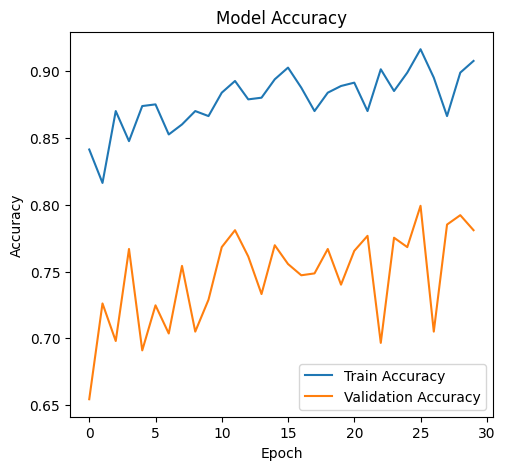

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Plotting Training and Validation Loss Curve

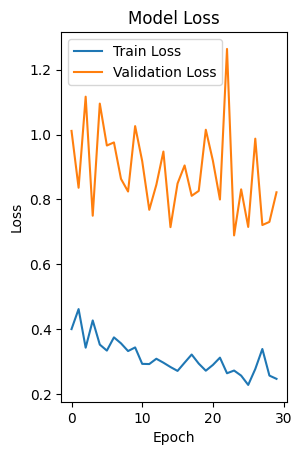

In [20]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#Saving the Trained Model

In [27]:
# Save the entire model to a HDF5 file
model.save("trained_model.h5")
print("Model saved as 'trained_model.h5'")

Model saved as 'trained_model.h5'


#Downloading the Trained Model to Local Machine

In [28]:
from google.colab import files
files.download('trained_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Printing Final Accuracy and Loss After Model Training

In [29]:
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

# Print final results
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.9075
Final Training Loss: 0.2468
Final Validation Accuracy: 0.7809
Final Validation Loss: 0.8220
